# Решение тестового задания от компании “БСТ Менеджмент-Консалтинг”

## Описание и условие задачи

Фабрика производит слова, из первого четверостишия Пушкина "Во глубине сибирских руд". Каждый день на фабрику поступает заказ на одно из слов из четверостишья.

**Задача**: определить оптимальный набор букв (стратегию), который нужно держать на складе для максимизации прибыли, при условиях:
- каждое проданное слово приносит 40 рублей;
- если слово невозможно собрать фабрика платит неустойку 10 рублей;
- если для того, чтобы собрать слово не хватает только одной буквы, ее можно доставить экспресс доставкой за 2 рубля;
- стоимость хранения одной буквы на складе 1 рубль в день;
- в конце дня запасы букв на складе возобновляются;
- регистр букв не имеет значения;
- знаки препинания не учитываются.

**Четверостишье**, слова из которого производит фабрика: \

***
Во глубине сибирских руд

Храните гордое терпенье,

Не пропадет ваш скорбный труд

И дум высокое стремленье.


## 1 Исследовательский анализ данных

In [ ]:
from collections import Counter, OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
from random import choice
from itertools import product
from ast import literal_eval

### 1.1 Исходные данные
Создадим глобальные переменные:
- `WORDS` - список всех слов в четверостишье;
- `QUATRAIN` - строка исходного четвиростишья.

In [ ]:
WORDS = [
    'во', 'глубине', 'сибирских', 'руд', 'храните', 'гордое', 'терпенье', 'не',
    'пропадет', 'ваш', 'скорбный', 'труд', 'и', 'дум', 'высокое', 'стремленье'
]

QUATRAIN = "".join(WORDS)

###1.2 Частотная таблица

Сформируем `DataFrame` основной статистической информации о входном четверостишье. Для этого выделим следующие словари:
- `freq_letter_in_quatre` - частота буквы в четверостишье;
- `max_num_occur_letter_in_word` - максимальное количество вхождений буквы в слово;
- `freq_occur_letters_in_words` - частота встречи буквы в словах четверостишья;


In [ ]:
freq_letter_in_quatre = Counter(QUATRAIN)

unique_letters = set(QUATRAIN)
max_num_occur_letter_in_word = dict()
freq_occur_letters_in_words = dict()

for letter in unique_letters:
    max_num_occur_letter_in_word[letter] = 0
    freq_occur_letters_in_words[letter] = 0
    for word in WORDS:
        if word.count(letter) > max_num_occur_letter_in_word[letter]:
            max_num_occur_letter_in_word[letter] = word.count(letter)
        if letter in word:
            freq_occur_letters_in_words[letter] += 1

In [ ]:
df = pd.DataFrame([freq_letter_in_quatre, max_num_occur_letter_in_word, freq_occur_letters_in_words],
    index=[
        "Частота буквы в четверостишье", "Максимальное количество вхождений буквы в слово",\
        "Частота встречи буквы в словах четверостишья"])
df = df[df.iloc[0].sort_values().index]

pd.set_option('display.max_columns', None)
df.head()

,ш,й,м,ы,г,л,ь,х,п,а,к,в,б,у,д,т,с,н,и,о,р,е
Частота буквы в четверостишье,1,1,2,2,2,2,2,2,3,3,3,3,3,4,5,5,5,6,6,7,9,12
Максимальное количество вхождений буквы в слово,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,3,2,1,3
Частота встречи буквы в словах четверостишья,1,1,2,2,2,2,2,2,2,3,3,3,3,4,5,5,4,6,4,5,9,8


###1.3 Частотные диаграммы

Построим частотную диаграмму букв в четверостишье. Можно заметить, что наиболее используемой буквой здесь является `е` (12 раз), а наименее используемыми - `ш` (1 раз), `й` (1 раз).

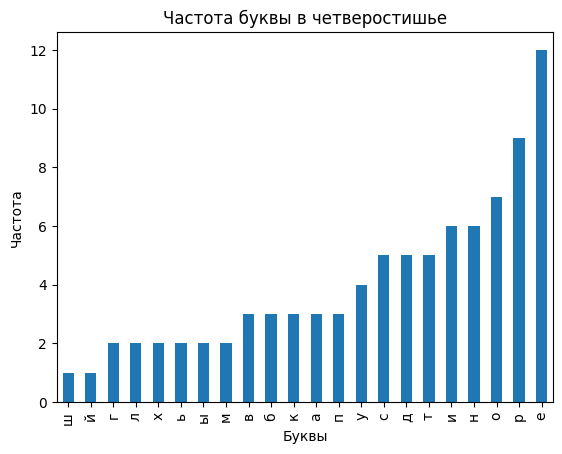

In [ ]:
sorted_dict = OrderedDict(sorted(freq_letter_in_quatre.items(), key=lambda x: x[1]))

my_series = pd.Series(sorted_dict)
my_series.plot(kind='bar')

plt.xlabel('Буквы')
plt.ylabel('Частота')
plt.title('Частота буквы в четверостишье')

plt.show()

Теперь построим диаграмму, отражающую частоту встреми буквы в словах четверостишья. Можно увидеть, что буква `р` встречается в 9 словах четверостишья, а бука `й` и `ш` лишь одинажды.

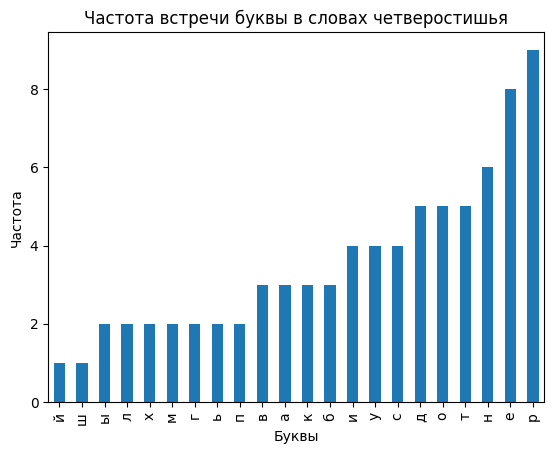

In [ ]:
sorted_dict = OrderedDict(sorted(freq_occur_letters_in_words.items(), key=lambda x: x[1]))

my_series = pd.Series(sorted_dict)
my_series.plot(kind='bar')

plt.xlabel('Буквы')
plt.ylabel('Частота')
plt.title('Частота встречи буквы в словах четверостишья')

plt.show()

И построим диаграмму для словаря максимальных вхождений букв в слово. Основываясь лишь на этой диаграмме можно предложить наивное решение предположив, что на складе будут храниться все буквы в необходимом достатке для продажи любого слова. Такая стратегия имеет вид: ('д', 1), ('ы', 1), ('л', 1), ('х', 1), ('в', 1), ('а', 1), ('м', 1), ('й', 1), ('н', 1), ('г', 1), ('ш', 1), ('к', 1), ('у', 1), ('б', 1), ('т', 1), ('р', 1), ('ь', 1), ('о', 2), ('с', 2), ('п', 2), ('е', 3), ('и', 3)


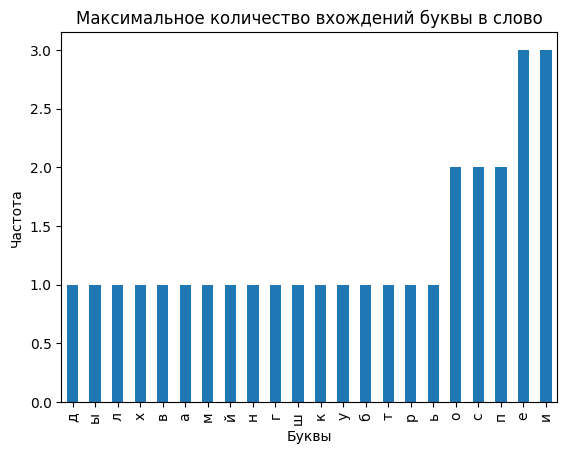

In [ ]:
sorted_dict = OrderedDict(sorted(max_num_occur_letter_in_word.items(), key=lambda x: x[1]))
my_series = pd.Series(sorted_dict)
my_series.plot(kind='bar')

plt.xlabel('Буквы')
plt.ylabel('Частота')
plt.title('Максимальное количество вхождений буквы в слово')

plt.show()

In [ ]:
strategy2 = {'х': 1, 'е': 1, 'б': 1, 'и': 1, 'ы': 1, 'о': 1, 'м': 1, 'п': 1, \
             'л': 1, 'ь': 1, 'с': 2, 'к': 1, 'г': 1, 'н': 1, 'а': 1, 'в': 1, \
             'д': 1, 'й': 0, 'ш': 0, 'т': 1, 'у': 1, 'р': 1}

## 2 Поиск оптимального набора букв (стратегии) для максимизации прибыли

### 2.1 Функция подсчета выгоды за один день

Определим функцию `calculate_profit_day`, которая будет подсчитывать выгоду за один день, на основе определенного набора букв на складе. Функция принимает 2 обязательных и 4 опциональных аргумента:
- `word` - слово, заказ случайного (равномерно распределенного) слова на фабрике;
- `strategy` - словарь, ключи которого представляют собой набор букв, а значения - их количество на складе;
- `express_delivery_cost`, `letter_storage_cost`, `word_price`, `penalty` - опциональные аргументы цены, обозначенные в услоии задачи.

In [ ]:
def calculate_profit_day(word, strategy, express_delivery_cost=2, \
                         letter_storage_cost=1, word_price=40, penalty=10):
    profit = -sum(strategy.values())
    order = Counter(word)
    missing_letters = 0

    # сколько всего пропущенно
    for letter in order.keys():
        if order[letter] - strategy[letter] > 0:
            missing_letters += 1

    if missing_letters > 1:
        profit -= penalty
    else:
        if missing_letters == 1:
            profit -= express_delivery_cost
        profit += word_price

    return profit

Протестируем функцию на наивном решении, обозначенном в пункте 1.3.

Предположим, что завод будет функционировать на протяжении `10000` дней. Заказы поступают случайно и равномерно распределенно. Таким образом прибыль завода составит`110000` рублей. Что в пересчете `11` руб/день.

Несмотря на то, что на складе у нас есть все буквы, которые могут понадобиться для создания любого слова, мы исправно платим за хранения всех этих букв на складе. Необходимо подобрать такой набор букв, который найдет баланс между хранением, экспресс доставкой и неустойкой.

In [ ]:
strategy = {'р': 1, 'х': 1, 'у': 1, 'е': 3, 'б': 1, 'н': 1, 'и': 3, 'ы': 1, \
             'т': 1, 'о': 2, 'ш': 1, 'м': 1, 'п': 2, 'д': 1, 'л': 1, 'а': 1, \
             'й': 1, 'г': 1, 'ь': 1, 'в': 1, 'с': 2, 'к': 1}

total_profit = 0
for _ in range(10000):
    random_word = choice(WORDS)
    total_profit += calculate_profit_day(random_word, strategy)
print(total_profit)

186288


### 2.2 Генерация стратегий

Первым же возможным решением задачи мог служить полный перебор всех возможных стратегий. Естественным ограничением на максимальное количество каждой буквы является наивное решение (пунк 1.3). Для этого реализуцем функцию `generate_variations`, которая записывает в текстовый файл (чтобы снизить нагрузку на оперативную память) все возможные комбинации набора букв.

In [ ]:
def generate_variations(strategy, tail_strategy, output_file):
    keys = list(strategy.keys())
    max_values = [strategy[key] + 1 for key in keys]

    with open(output_file, 'w') as file:
        for values in product(*[range(max_value) for max_value in max_values]):
            variation = {keys[i]: values[i] for i in range(len(keys))}
            variation |= tail_strategy
            file.write(str(variation) + '\n')

Чисто теоретически на этом решение можно было бы и остановить, потому что при ассимптотической сложности стремящейся к O(2^n), где n - количество уникальных букв в четверостишье (21). Средствами Google Colab результат можно было бы получить за 10 часов. Но интереснее решить это гораздо быстрее. Поэтому будем использовать эвристический подход, который позволит уменьшить порядок вычислительной сложности решения.

Для этого взглянем на частотную таблицу из пункта 1.2. Зафиксируем на складе буквы, которые встремаются максимум 1 раз в слове и чья частота встречи буквы в словах четверостишья больше 3. Такими буквами являются: `а, к,	в, б,	у,	д,	т,	н`. Фиксируем мы их из соображения того, что нам было бы эффективно держать всегда их на складе, потому что они встречаются в наибольшем количестве слов. Также можем из сключить из склада те буквы, которые встречаются всего в одном слове. Таким буквам соответствуют `й, ш`. Таким образом асимтотику можно снизить до О(2^11). Чтобы убедиться в корректности такого подхода, было проведено большое количество экспериментов, которые успешно подтвердили эту гипотезу.

In [ ]:
strategy = {'ы': 1, 'ь': 1, 'х': 1, 'е': 1, 'о': 2, 'п': 2, 'л': 1, 'г': 1,
            'с': 2, 'м': 1, 'и': 3}

tail_strategy = {'ш': 0, 'й': 0, 'а': 1, 'к': 1, 'в': 1, 'б': 1, 'у': 1, \
                 'д': 1, 'т': 1,'н': 1, 'р': 1}

output_file = 'variations.txt'
generate_variations(strategy, tail_strategy, output_file)

###2.3 Поиск наиболее выгодной стратегии

Используя полученные вариации стартегий, посчитаем для каждой выгоду и сохраним самую выгодную в переменную `best_strategy`. Рассматривать будем ситуацию работы завода на проятжении 1000 дней при случайном равномерно распределенном заказе слов.

In [ ]:
best_strategy = ""
best_profit = 0
with open(output_file, 'r') as file:
    for line in file:
        strategy = literal_eval(line.rstrip())
        total_profit = 0
        for _ in range(1000):
            total_profit += calculate_profit_day(choice(WORDS), strategy)
        if total_profit > best_profit:
            best_strategy = strategy
            best_profit = total_profit
print(best_profit, ':', best_strategy)

18610 : {'ы': 1, 'ь': 1, 'х': 1, 'е': 1, 'о': 1, 'п': 1, 'л': 1, 'г': 1, 'с': 2, 'м': 1, 'и': 0, 'ш': 0, 'й': 0, 'а': 1, 'к': 1, 'в': 1, 'б': 1, 'у': 1, 'д': 1, 'т': 1, 'н': 1, 'р': 1}


Получим наилучшую стратегию. За тысячу дней она позволит получить доход `18610` рублей, что составляет `18,6` руб/день. Чтобы оценить стабильность стратегии, произвдем несколько экспериментов с разным количеством дней и разными распределениями заказов слов.

In [ ]:
top_strategy = {'ы': 1, 'ь': 1, 'х': 1, 'е': 1, 'о': 1, 'п': 1, 'л': 1, 'г': 1, \
            'с': 2, 'м': 1, 'и': 0, 'ш': 0, 'й': 0, 'а': 1, 'к': 1, 'в': 1, \
            'б': 1, 'у': 1, 'д': 1, 'т': 1, 'н': 1, 'р': 1}

total_profit = 0
for _ in range(10000):
    random_word = choice(WORDS)
    total_profit += calculate_profit_day(random_word, top_strategy)
print(total_profit)

Лешин набор: 6.4924 руб/день
Владика набор: 18.621 руб/день


# 3 Подведение итогов

Добавим в частотную таблицу строку `Наиболее эффективная стратегия`, чтобы сопоставить выбранный набор букв для склада и частотные характеристики.

In [ ]:
df.loc["Наиболее эффективная стратегия"] = top_strategy

pd.set_option('display.max_columns', None)
df.head()

,ш,й,м,ы,г,л,ь,х,п,а,к,в,б,у,д,т,с,н,и,о,р,е
Частота буквы в четверостишье,1,1,2,2,2,2,2,2,3,3,3,3,3,4,5,5,5,6,6,7,9,12
Максимальное количество вхождений буквы в слово,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,3,2,1,3
Частота встречи буквы в словах четверостишья,1,1,2,2,2,2,2,2,2,3,3,3,3,4,5,5,4,6,4,5,9,8
Наиболее эффективная стратегия,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,0,1,1,1


В выбранной стратегии несмотря на то, что буква `и` часто встречается и в разных словах, и может трижды в одном слове встретиться и в целом шесть раз встречается в четверостишье, мы принимаем решение не закупать букву на склад. Это связано с тем, что одним словом можно пожертвовать и платить за него всегда неустойку (это выгоднее, чем хранить хотя бы две буквы на складе), а в остальные разы она встречается лишь одиножды и мы будем докупать ее экспрессом. В тоже самое время, это будет лишь единственный пропуск, потому что остальные буквы в слове будут однозначно закуплены.

Стратегия выбиралась на основе генерации всевозможных комбинаций закупки, которые были ограничены эвристическими методами, что помогло снизить автоматический выбро стратегии с 10 часов до 1 минуты.

Итого, выбранный набор букв, как наиболее оптимальный, который нужно держать на складе для максимизации прибыли при заданных условиях:
- приносит доход `18,6` руб/день.
- набор букв:

In [ ]:
{'ы': 1, 'ь': 1, 'х': 1, 'е': 1, 'о': 1, 'п': 1, 'л': 1, 'г': 1, \
            'с': 2, 'м': 1, 'и': 0, 'ш': 0, 'й': 0, 'а': 1, 'к': 1, 'в': 1, \
            'б': 1, 'у': 1, 'д': 1, 'т': 1, 'н': 1, 'р': 1}

{'ы': 1,
 'ь': 1,
 'х': 1,
 'е': 1,
 'о': 1,
 'п': 1,
 'л': 1,
 'г': 1,
 'с': 2,
 'м': 1,
 'и': 0,
 'ш': 0,
 'й': 0,
 'а': 1,
 'к': 1,
 'в': 1,
 'б': 1,
 'у': 1,
 'д': 1,
 'т': 1,
 'н': 1,
 'р': 1}